In [1]:
import numpy as np
from scipy.linalg import expm, ishermitian
from qiskit import *
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import SwapGate, RYGate, QFT
from copy import deepcopy
import math
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import pylatexenc

In [2]:
b = np.array([1.775,2.776,1.992,0.189])
# Normalize b
beta = np.linalg.norm(b,2)
b = b/beta
print(b)

[0.46044779 0.7201144  0.51673915 0.04902796]


In [3]:
b_qubits = int(np.log2(len(b)))
print(b_qubits)

2


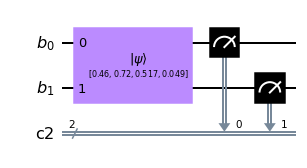

In [12]:
b_reg = QuantumRegister(b_qubits, 'b')
b_clr = ClassicalRegister(b_qubits)
circuit = QuantumCircuit(b_reg, b_clr)
init = Initialize(list(b))
circuit.append(init,b_reg)
circuit.measure(b_reg, b_clr)
circuit.draw('mpl')

In [16]:
circuit = transpile(circuit, basis_gates=['u','cx'])

In [36]:
math.acos(b[2])

1.027758541864351

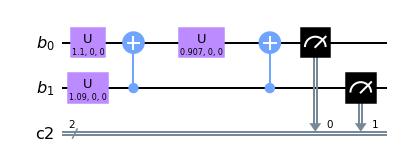

In [17]:
circuit.draw('mpl')

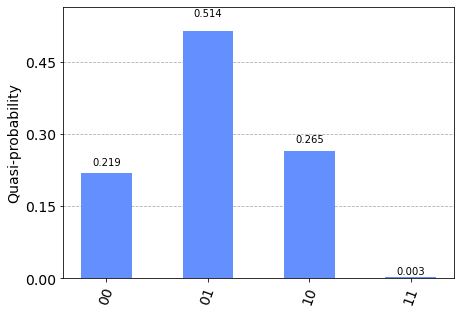

In [13]:
sim = Aer.get_backend("aer_simulator_statevector")
job = execute(circuit,backend=sim,shots=10000)
results = job.result().get_counts()
for key in results:
    results[key] *= (1/10000)
plot_histogram(results)